<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 1 - Data Visualization
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Visualization
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install squarify
import squarify 

In [2]:
data_df= pd.read_csv('../data/Processed.csv', index_col=False)
data_df.sample(n=5)

,Age,Gender,Year In School,Major,Monthly Income,Financial Aid,Tuition,Housing,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous,Preferred Payment Method
732,22,Non-binary,Junior,Computer Science,1195,988,5729,455,115,117,74,129,93,154,155,190,Credit/Debit Card
954,25,Male,Freshman,Engineering,668,893,3446,653,347,88,276,73,95,73,152,35,Cash
236,21,Male,Sophomore,Computer Science,809,768,4079,505,186,176,217,70,81,194,193,91,Cash
966,19,Male,Junior,Engineering,1015,493,5435,827,369,147,121,87,49,289,121,74,Mobile Payment App
619,19,Male,Junior,Engineering,542,205,4638,838,332,67,237,74,80,205,116,175,Mobile Payment App


In [3]:
n_rows=data_df.shape[0]
n_cols=data_df.shape[1]
n_rows, n_cols

(1000, 17)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Year In School            1000 non-null   object
 3   Major                     1000 non-null   object
 4   Monthly Income            1000 non-null   int64 
 5   Financial Aid             1000 non-null   int64 
 6   Tuition                   1000 non-null   int64 
 7   Housing                   1000 non-null   int64 
 8   Food                      1000 non-null   int64 
 9   Transportation            1000 non-null   int64 
 10  Books & Supplies          1000 non-null   int64 
 11  Entertainment             1000 non-null   int64 
 12  Personal Care             1000 non-null   int64 
 13  Technology                1000 non-null   int64 
 14  Health & Wellness        

## Câu hỏi 1: Thành phần chi tiêu (trung bình) của sinh viên.

### 1. Mục đích

- Nhằm biết được nhu cầu về tài chính và mức độ chi tiêu của sinh viên trong các hạng mục:
    - Tiền nhà
    - Tiền ăn uống
    - Tiền đi lại
    - Tiền sách/tài liệu học tập
    - Tiền giải trí
    - Tiền chăm sóc bản thân
    - Tiền cho các đồ dùng công nghệ
    - Tiền cho sức khỏe
    - Các loại chi tiêu khác

### 2. Phân tích

In [5]:
# Prepare Necessary DataFrame
df = data_df.describe().agg('mean').iloc[4:].sort_values(ascending=True).to_frame().reset_index()
df.columns = ['class', 'counts']
df

,class,counts
0,Personal Care,173.324626
1,Entertainment,193.598056
2,Miscellaneous,213.509028
3,Health & Wellness,217.487693
4,Transportation,223.930624
5,Books & Supplies,265.270690
6,Technology,266.631055
7,Food,324.948951
8,Housing,668.590577


In [6]:
# Prepare Data For Plot
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(int(x[1])) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

### 3. Trực quan hóa

- Vì cần phải thể hiện thành phần trong biểu đồ (Composition) nên ta chọn bản đồ cây (Treemap) để trực quan hóa.
- Thay vì sử dụng biểu đồ hình tròn (Pie chart), ta sử dụng bản đồ cây vì nó dễ nhìn hơn khi có nhiều thành phần trong cùng một biểu đồ.

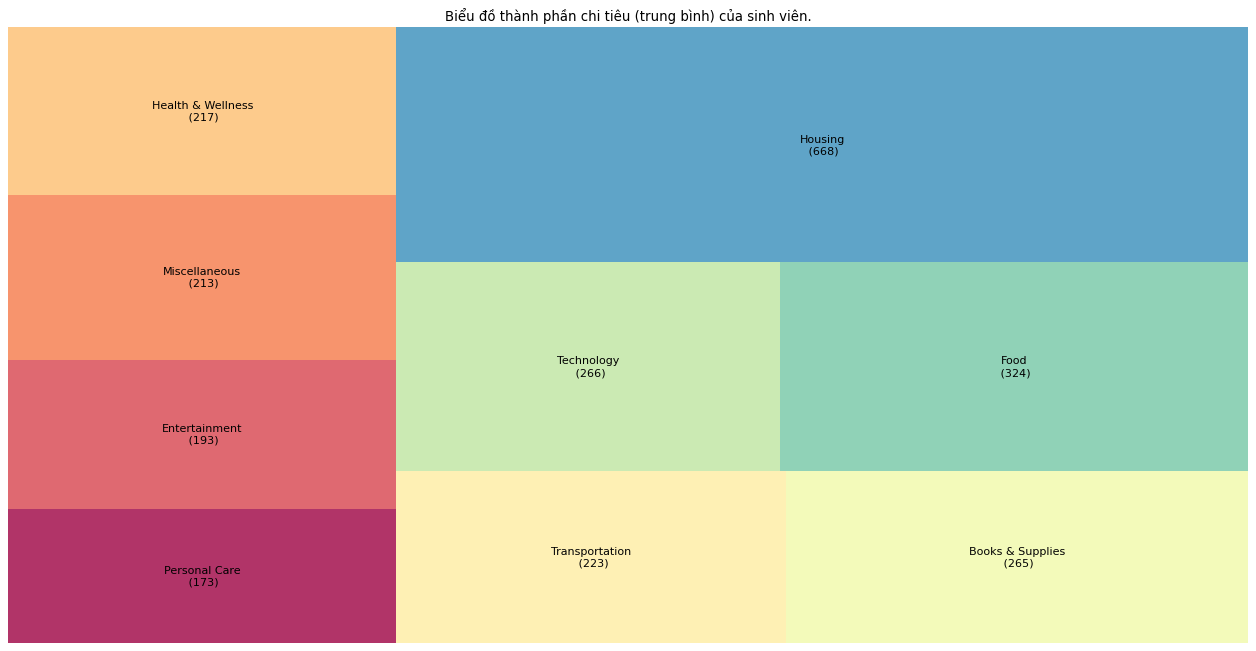

In [7]:
# Draw Plot
plt.figure(figsize=(20,10), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Biểu đồ thành phần chi tiêu (trung bình) của sinh viên.')
plt.axis('off')
plt.savefig("figures/Question1.svg")

### 4. Kết luận

- Sinh viên cần chi tiêu cho tiền nhà với số tiền nhiều nhất.
- Sinh viên chi tiêu cho các đồ dùng công nghệ nhiều bất thường.
- Sinh viên có xu hướng ít chi tiêu cho chăm sóc bản thân.

## Câu hỏi 2: Tổng chi tiêu của sinh viên từng chuyên ngành theo năm học thay đổi như thế nào?

### 1. Mục đích

Một trong những mục tiêu của việc phân tích tổng chi tiêu của sinh viên theo ngành học và năm học là để hiểu sâu hơn về các yếu tố khác nhau ảnh hưởng như thế nào đến chi tiêu của sinh viên trong quá trình học tập của họ. Một số mục tiêu cụ thể có thể bao gồm:

- Hiểu xu hướng chi tiêu: Phân tích tổng chi tiêu theo năm học có thể giúp chúng ta nắm bắt được xu hướng chung về cách chi tiêu của sinh viên thay đổi theo thời gian. Điều này có thể làm sáng tỏ sự phát triển của sinh viên trong suốt những năm học và xác định các yếu tố có thể ảnh hưởng đến mức chi tiêu của họ.
- Xác định sự khác biệt giữa các chuyên ngành: So sánh tổng chi tiêu giữa các chuyên ngành khác nhau có thể giúp chúng ta hiểu được sự khác biệt về mức chi tiêu giữa các nhóm sinh viên. Điều này có thể phản ánh các yếu tố như thu nhập trung bình sau khi tốt nghiệp, chi phí học phí hoặc sở thích chi tiêu của sinh viên dựa trên chuyên ngành của họ.

### 2. Phân tích

In [8]:
data_df['Total Spending'] = data_df.iloc[:, 5:-1].sum(axis=1)
grouped = data_df.groupby(['Major', 'Year In School']).mean(numeric_only=True)
grouped

Age  Monthly Income  Financial Aid  \
Major            Year In School                                             
Biology          Freshman        21.298246     1006.473684     460.105263   
                 Junior          21.885246     1006.688525     518.672131   
                 Senior          21.433962     1077.433962     517.169811   
                 Sophomore       21.649123     1038.350877     462.368421   
Computer Science Freshman        21.641509     1008.735849     586.811321   
                 Junior          21.673913      979.608696     561.521739   
                 Senior          21.234043      989.744681     522.893617   
                 Sophomore       22.217391      946.195652     523.478261   
Economics        Freshman        21.113636     1126.636364     498.045455   
                 Junior          22.166667      942.541667     522.083333   
                 Senior          21.767857     1010.839286     515.250000   
                 Sophomore       21.821429     1007.589286     486.446429   
Engineering      Freshman        21.680851     1033.829787     484.595745   
                 Junior          21.250000     1069.416667     537.270833   
                 Senior          21.947368     1067.929825     477.649123   
                 Sophomore       22.275000      999.425000     484.125000   
Psychology       Freshman        21.692308     1124.076923     491.788462   
                 Junior          21.522727     1013.090909     450.772727   
                 Senior          21.463415      945.975610     485.219512   
                 Sophomore       21.744681      991.170213     511.234043   

                                     Tuition     Housing        Food  \
Major            Year In School                                        
Biology          Freshman        4332.684211  748.754386  261.614035   
                 Junior          4387.573770  691.770492  238.147541   
                 Senior          4586.433962  721.849057  259.830189   
                 Sophomore       4535.403509  638.070175  247.859649   
Computer Science Freshman        4548.924528  726.094340  250.924528   
                 Junior          4651.152174  710.695652  253.869565   
                 Senior          4437.957447  726.851064  236.234043   
                 Sophomore       4581.217391  704.826087  239.782609   
Economics        Freshman        4618.136364  636.386364  252.590909   
                 Junior          4708.541667  703.729167  244.729167   
                 Senior          4271.446429  693.750000  272.410714   
                 Sophomore       4475.035714  659.446429  260.160714   
Engineering      Freshman        4466.553191  666.148936  252.659574   
                 Junior          4541.875000  746.312500  251.083333   
                 Senior          4370.421053  708.298246  260.087719   
                 Sophomore       4400.575000  655.375000  249.775000   
Psychology       Freshman        4595.250000  720.019231  249.846154   
                 Junior          4715.159091  675.340909  253.204545   
                 Senior          4685.121951  693.463415  253.682927   
                 Sophomore       4664.446809  678.191489  260.255319   

                                 Transportation  Books & Supplies  \
Major            Year In School                                     
Biology          Freshman            135.403509        185.912281   
                 Junior              119.393443        171.344262   
                 Senior              121.811321        178.773585   
                 Sophomore           123.280702        173.859649   
Computer Science Freshman            123.698113        186.754717   
                 Junior              123.956522        157.108696   
                 Senior              125.829787        171.829787   
                 Sophomore           124.500000        183.021739   
Economics        Freshman            121.477273        174.318182   


### 3. Trực quan hóa

- Vì cần một biểu đồ thể hiện sự biến đổi qua từng năm của chi tiêu của các ngành học và dễ dàng so sánh các chi tiêu giữa ngành học với nên ta chọn biểu đồ đường

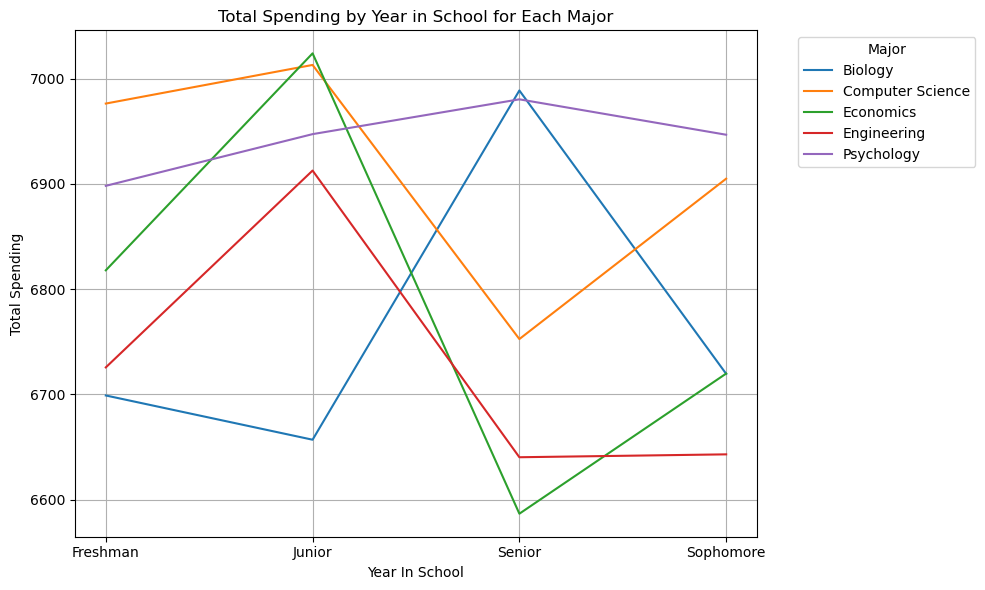

In [9]:
plt.figure(figsize=(10, 6))

# Iterate through each major
for major, group in grouped.groupby(level=0):
    plt.plot(group.index.get_level_values('Year In School'), group['Total Spending'], label=major)

plt.title('Total Spending by Year in School for Each Major')
plt.xlabel('Year In School')
plt.ylabel('Total Spending')
plt.legend(title='Major', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/Question2.svg")

### 4. Kết luận

- Chuyên ngành `Tâm lý` có vẻ ổn định: Sự ổn định trong chi tiêu của sinh viên ngành `Tâm lý` có thể phản ánh mức chi tiêu ổn định qua các năm học.
- Chuyên ngành `Kinh tế` có những biến động lớn nhất: Những biến động đáng kể trong chi tiêu của sinh viên `Kinh tế` có thể cho thấy sự thay đổi trong thói quen chi tiêu của họ, đặc biệt là trong năm thứ hai và thứ ba. Có thể có cả yếu tố bên trong và bên ngoài gây ra những biến động này, chẳng hạn như thay đổi về mức thu nhập, học phí hoặc thay đổi ưu tiên chi tiêu.
- Chuyên ngành `Khoa học Máy tính` luôn là một trong những khoản chi tiêu lớn nhất: Xu hướng sinh viên `Khoa học Máy tính` chi tiêu cao nhất có thể phản ánh các chi phí cụ thể liên quan đến công nghệ, phần cứng và phần mềm cần thiết cho việc học tập và nghiên cứu trong lĩnh vực này.
- `Kinh tế` luôn là một trong những khoản chi tiêu chính ít nhất: Sự biến động thấp trong chi tiêu của sinh viên `Kinh tế` có thể phản ánh sự thận trọng hoặc chú trọng vào quản lý tài chính và tiết kiệm.

## Câu hỏi 3: Sự phân bổ chi tiêu cá nhân (trừ học phí) của sinh viên thuộc các ngành học khác nhau

### 1. Mục đích

Biết được sự phân bổ chi tiêu và đánh giá được sự khác nhau của các sinh viên ở cụ thể các ngành học
Biết được mức độ đầu tư và chú trọng của sinh viên vào mục đích cụ thể nào
Ở đây chỉ đánh giá chi tiêu cá nhân từ chính sinh viên nên học phí cố định sẽ không được đề cập tới

### 2. Phân tích

In [10]:
spending_df = data_df[['Major', 'Financial Aid', 'Housing', 'Food', 'Transportation', 'Books & Supplies',
                 'Entertainment', 'Personal Care', 'Technology', 'Health & Wellness', 'Miscellaneous']]
grouped_df = spending_df.groupby('Major').sum().iloc[:, 1:]
grouped_df

,Housing,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous
Major,,,,,,,,,
Biology,159505,57338,28484,40434,19820,13433,41596,27732,25171
Computer Science,137759,47110,23899,33620,15766,11823,33791,22326,21311
Economics,137559,52685,25404,35363,17302,12005,36327,21798,21790
Engineering,133720,48743,23824,33857,16281,11819,34152,20604,20911
Psychology,127463,46766,23026,31487,15645,11619,32438,21850,19727


### 3. Trực quan hóa

- Dùng biểu đồ tròn (Pie chart) để trực quan dữ liệu.
- Tương ứng với mỗi ngành học sẽ là một biểu đồ tròn thể hiện phân trăm chi tiêu của mỗi mục đích.
- Ngoài ra còn có thể so sánh phần trăm chi tiêu của cùng một mục đích giữa các ngành học với nhau.

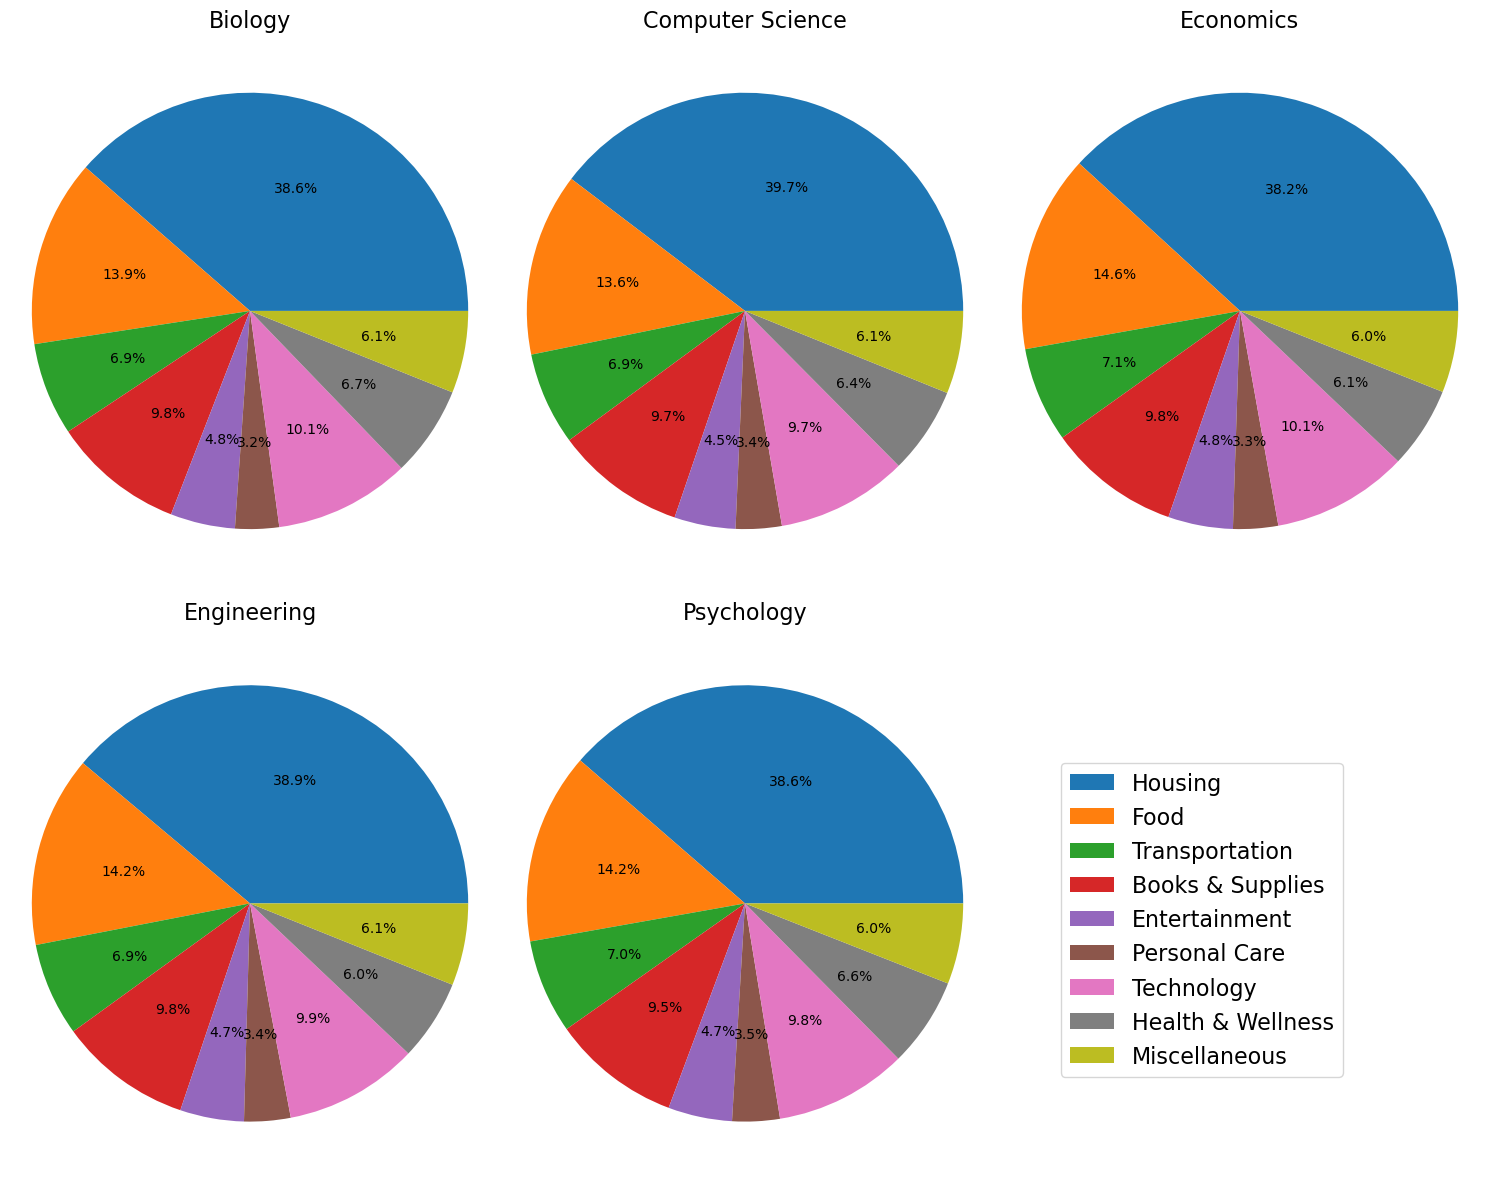

In [11]:
fig, axs = plt.subplots(grouped_df.shape[0] // 3 + 1, 3, figsize=(15, 12))

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        if i * 3 + j < grouped_df.shape[0]:
            ax.pie(grouped_df.iloc[i * 3 + j], labels=None, autopct='%1.1f%%')
            ax.axis('equal')
            ax.set_title(grouped_df.index[i * 3 + j], fontsize=16)
        else:
            ax.axis('off')
plt.tight_layout()
axs[0, 0].legend(labels=grouped_df.columns, bbox_to_anchor=(2.8, -0.3), fontsize=16)
plt.savefig("figures/Question3.svg")

### 4. Kết luận

- Sinh viên ở 5 ngành học (Sinh học, Khoa học máy tính, Kinh tế, Kỹ thuật, Tâm lý) đều có mức phân bổ chi tiêu khá đồng đều ở các chỉ mục, cụ thể:
    - Các sinh viên chi tiêu vào chỗ ở nhiều nhất với khoảng 38-39% chi tiêu tiếp đến là về ăn uống và các thiết bị, tài liệu học tập.
    - Các sinh viên chi tiêu cho việc chăm sóc bản thân và sức khỏe rất ít, có thể các sinh viên ít gặp vấn đề về sức khỏe, cũng có thể điều kiện và môi trường học tập không quan trọng quá về việc chăm sóc bản thân.

## Câu hỏi 4: Diễn biến chi tiêu cá nhân (trừ học phí) của sinh viên theo từng độ tuổi

### 1. Mục đích

- Biết và đánh giá được sự biến thiên trong chi tiêu của các sinh viên qua các độ tuổi.
- Bên cạnh đó cũng thấy được phần nào tổng quan về mức độ chi tiêu của các sinh viên.

### 2. Phân tích

In [12]:
spending_df = data_df[['Age', 'Financial Aid', 'Housing', 'Food', 'Transportation', 'Books & Supplies',
                 'Entertainment', 'Personal Care', 'Technology', 'Health & Wellness', 'Miscellaneous']]
grouped_df = spending_df.groupby('Age').sum().iloc[:, 2:]
grouped_df

,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous
Age,,,,,,,,
18,30800,15414,20980,10008,7884,22047,13957,12654
19,26193,13864,18679,8858,6838,20523,12774,12195
20,27350,13687,20152,9148,6527,18648,12940,11811
21,31621,14552,20521,10094,6793,20760,13864,13511
22,33476,16106,22626,11117,8289,23230,14683,14476
23,31823,16434,22039,11057,7673,21548,14517,14473
24,33935,17061,23051,11896,8373,25390,15379,14430
25,37444,17519,26713,12636,8322,26158,16196,15360


### 3. Trực quan hóa
- Dùng biểu đồ đường (Line plot) để trực quan hóa dữ liệu.
- Các danh mục chi tiêu được thể hiện bằng một line có biết sự thay đổi chi tiêu của danh mục đó theo từng độ tuổi của sinh viên.
- Ngoài ra, ta còn có thể so sanh chi tiêu giữa các danh mục.

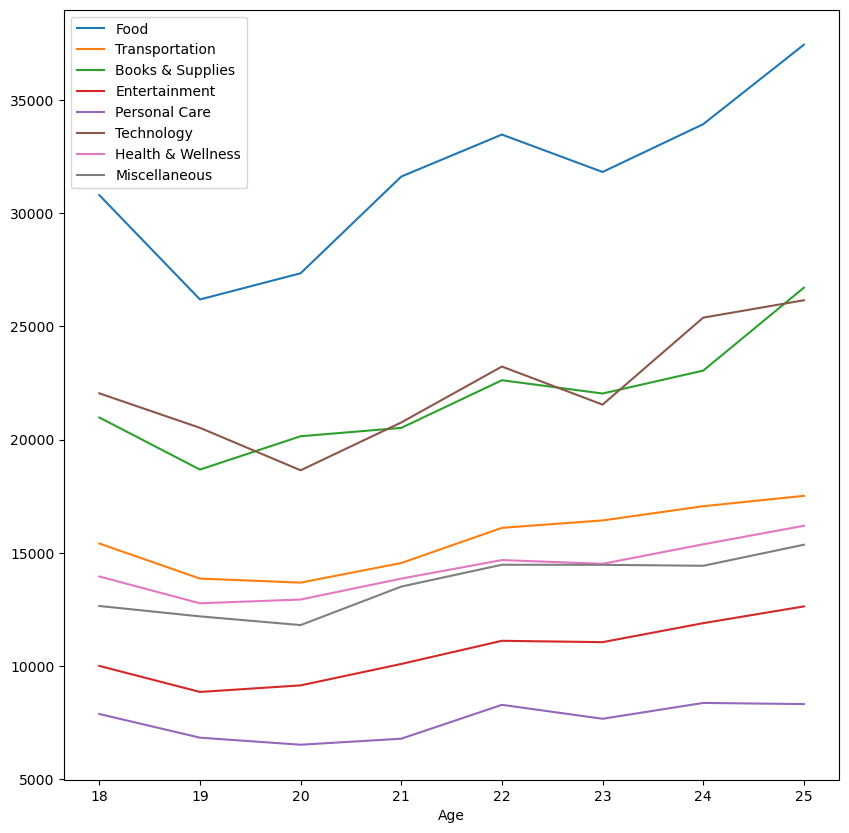

In [13]:
grouped_df.plot(figsize=(10, 10))
plt.savefig("figures/Question4.svg")

### 4. Kết luận

- Nhìn chung, chi tiêu có xu hướng tăng cho thấy được tổng chi tiêu của các sinh viên tăng lên theo từng độ tuổi.
- Các mục chi tiêu đều có sự biến thiên tương tự nhau, nếu giảm thì các mục đều giảm và ngược lại.
- Tại độ tuổi từ 19 đến 21 thì chi tiêu giảm, có thể lí giải là do so với tuổi 18 trước đó cần chi tiêu để bắt đầu hình thành môi trường Đại học và 22 tuổi thì bắt đầu đầu tư để phục vụ tốt nghiệp và đi làm. Điều đó cũng khiến cho tuổi 23 lại giảm chi tiêu nhưng sau đó chi tiêu lại tăng đều vì ít nhất các sinh viên đã bắt nhịp được với việc làm một cách ổn định hơn.

## Câu hỏi 5: Chuyên ngành (Major) và Thu nhập hằng tháng (Monthly Income) có ảnh hưởng đến tiền trợ cấp không (Financial Aid)?

### 1. Mục đích

Việc tìm hiểu mối quan hệ giữa chuyên ngành và thu nhập hằng tháng đối với tiền trợ cấp có thể giúp sinh viên định hướng chuyên ngành để theo học dựa vào mức kinh tế của gia đình và bản thân. Từ đó, giảm bớt được gánh nặng kinh tế cho gia đình và có định hướng rõ ràng cho con đường học vấn.

### 2. Phân tích

In [14]:
df = data_df[['Major', 'Monthly Income', 'Financial Aid']]
income_on_major = df.groupby('Major')['Monthly Income'].sum()
aid_on_major = df.groupby('Major')['Financial Aid'].sum()

### 3. Trực quan hóa

- Biểu đồ sử dụng là biểu đồ cột (Multiple bar chart).
- Ở đây, từng nhóm 2 cột thể hiện Thu nhập hằng tháng (Monthly Income) và Tiền trợ cấp (Financial Aid) cho từng Chuyên ngành (Major).
- Cột màu xanh thể hiện Thu nhập hằng tháng (Monthly Income) và cột màu cam thể hiện Tiền trợ cấp (Financial Aid) của sinh viên trong từng nhóm chuyên ngành.

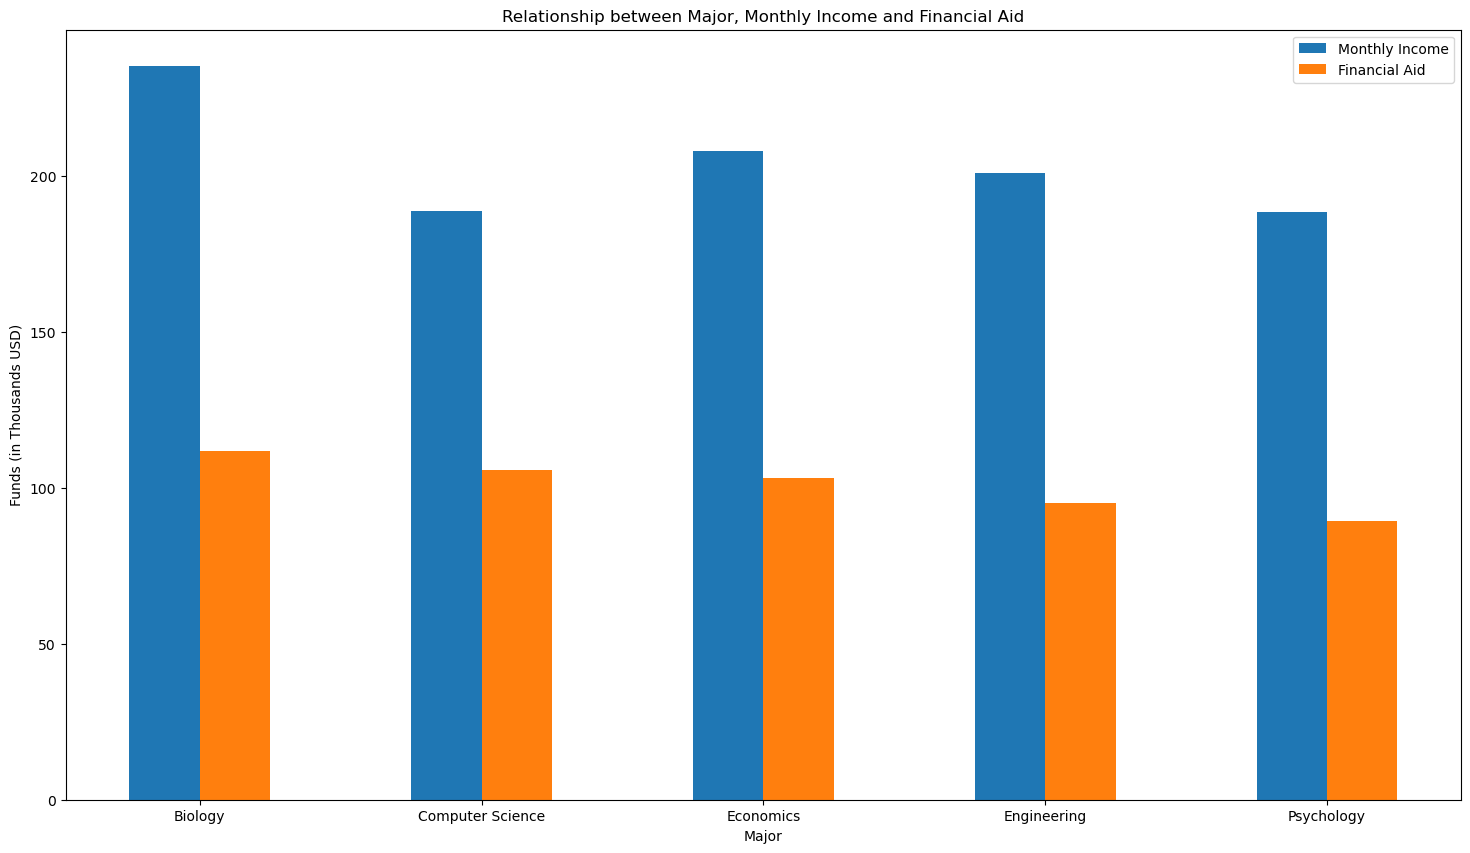

In [15]:
majors = income_on_major.index

plt.figure(figsize = (18, 10))

positions = np.arange(len(majors))
rect1 = plt.bar(x = positions - 0.125, height = income_on_major / 1000, 
        width = 0.25, align = 'center', label = 'Monthly Income')
rect2 = plt.bar(x = positions, height = aid_on_major / 1000, 
        width = 0.25, align = 'edge', label = 'Financial Aid')

plt.xlabel('Major')
plt.ylabel('Funds (in Thousands USD)')
plt.xticks(range(0, 5), majors)
plt.title('Relationship between Major, Monthly Income and Financial Aid')
plt.legend(loc = 'best')

plt.savefig("figures/Question6.svg")

### 4. Kết luận

Dựa vào biểu đồ, ta có thể thấy:

- Đối với các chuyên ngành, các chuyên ngành có thiên hướng nghiên cứu khoa học như Biology và Computer Science được trợ cấp nhiều hơn các chuyên ngành hướng về thực tế. Điều này dễ hiểu bởi vì nghiên cứu khoa học cần thí nghiệm nghiên cứu hoặc đầu tư vào trang thiết bị, cũng như là các khảo sát để lấy số liệu cho việc nghiên cứu.
- Tiền trợ cấp có xu hướng tăng khi thu nhập hằng tháng tăng. Tuy nhiên, ta cũng thấy rằng tiền trợ cấp cũng không quá phụ thuộc vào thu nhập hằng tháng và chuyên ngành theo học thông qua 2 chuyên ngành Computer Science và Psychology. Mặc dù có mức thu nhập thấp nhất nhưng sinh viên Computer Science có mức trợ cấp cao hơn hầu hết các chuyên ngành khác.

Vì vậy, ta kết luận mức trợ cấp không quá phụ thuộc vào chuyên ngành và thu nhập hằng tháng, và cần nhiều dữ liệu hơn để có thể đánh giá thêm.

## Câu hỏi 6: Phương thức thanh toán được sinh viên từng độ tuổi ưu tiên sử dụng?

### 1. Mục đích

Để biết được thói quen tiêu dùng của sinh viên thuộc các độ tuổi khác nhau, từ đó có thể đưa ra nhận định tổng quát cho toàn bộ sinh viên.

### 2. Phân tích

In [16]:
payment_methods = data_df.groupby('Age')['Preferred Payment Method'].value_counts()
payment_methods_df = payment_methods.unstack().reset_index().set_index('Age')

### 3. Trực quan hóa

- Biểu đồ sử dụng là biểu đồ tròn (Pie chart).
- Mỗi biểu đồ tròn thể hiện sự lựa chọn Phương thức thanh toán (Preferred Payment Method) của các sinh viên trong từng độ tuổi với các màu khác nhau đại diện cho từng phương thức thanh toán:
    - Màu xanh dương: Credit/Debit Card
    - Màu cam: Mobile Payment App
    - Màu xanh lá: Cash

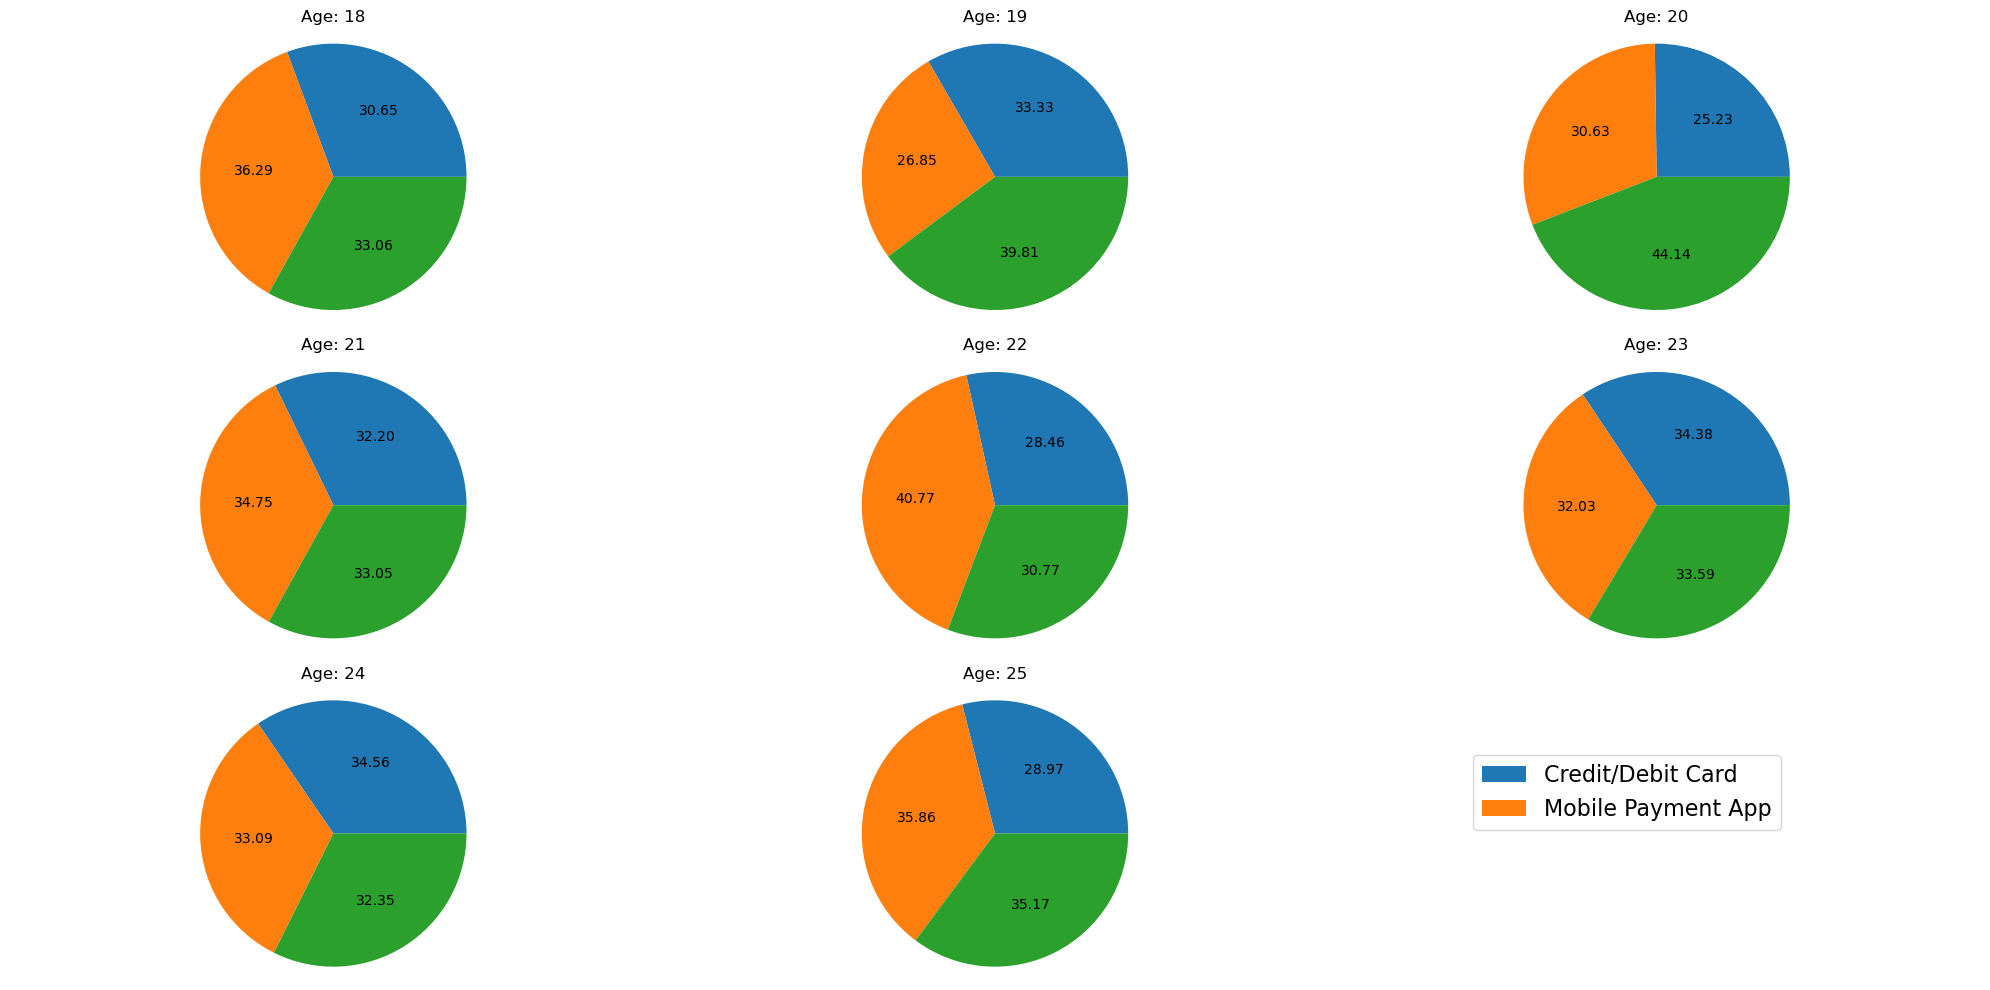

In [17]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))

for i, ax in enumerate(axes.flatten()):
    if i == 8:
        ax.axis('off')
    else:    
        age = payment_methods_df.index[i]
        ax.pie(payment_methods_df.loc[age],
               autopct = '%.2f')
        ax.axis('equal')
        ax.set_title(f'Age: {age}')
        
plt.tight_layout()
axes[0, 0].legend(payment_methods_df.columns[1:], 
                  loc = 'center', bbox_to_anchor = (2.5 , -1.6), fontsize = 16)
plt.savefig("figures/Question6.svg")

### 4. Kết luận

Theo biểu đồ trên, các sinh viên ở các độ tuổi khác nhau sử dụng khá đồng đều các phương thức thanh toán. Phương thức thanh toán thông qua ứng dụng online được sinh viên khá ưu tiên sử dụng. Điều này là dễ hiểu vì ở lứa tuổi thanh niên dễ tiếp cận các loại công nghệ.

## Câu hỏi 7: Số lượng sinh viên chọn tường phương thức thanh toán ưu tiên theo ngành học và theo năm học

### 1. Mục đích

Biết được trong từng ngành học, theo từng năm số lượng sinh viên chọn từng phương thức ưu tiên thanh toán là bao nhiêu.

### 2. Phân tích

In [18]:
df_ = data_df[["Major", "Preferred Payment Method", "Year In School", "Age"]].groupby(["Major", "Year In School", "Preferred Payment Method"]).count()
df_.head()

Age
Major   Year In School Preferred Payment Method     
Biology Freshman       Cash                       16
                       Credit/Debit Card          20
                       Mobile Payment App         21
        Junior         Cash                       13
                       Credit/Debit Card          22

### 3. Trực quan hóa

Chọn biểu đồ ```cột chồng``` (Stacked Bar Chart).
- So sánh được tổng số lượng sinh viên ở từng năm học: năm 1 (freshman), năm 2 (junior), năm 3 (senior), năm 4 (sophomore)
- Với mỗi sinh viên từng năm học có thể nhìn nhận nhanh, sinh viên sử dụng các phương thức thanh toán (Cash, Credit/Debit Card, Mobile Payment App) như thế nào

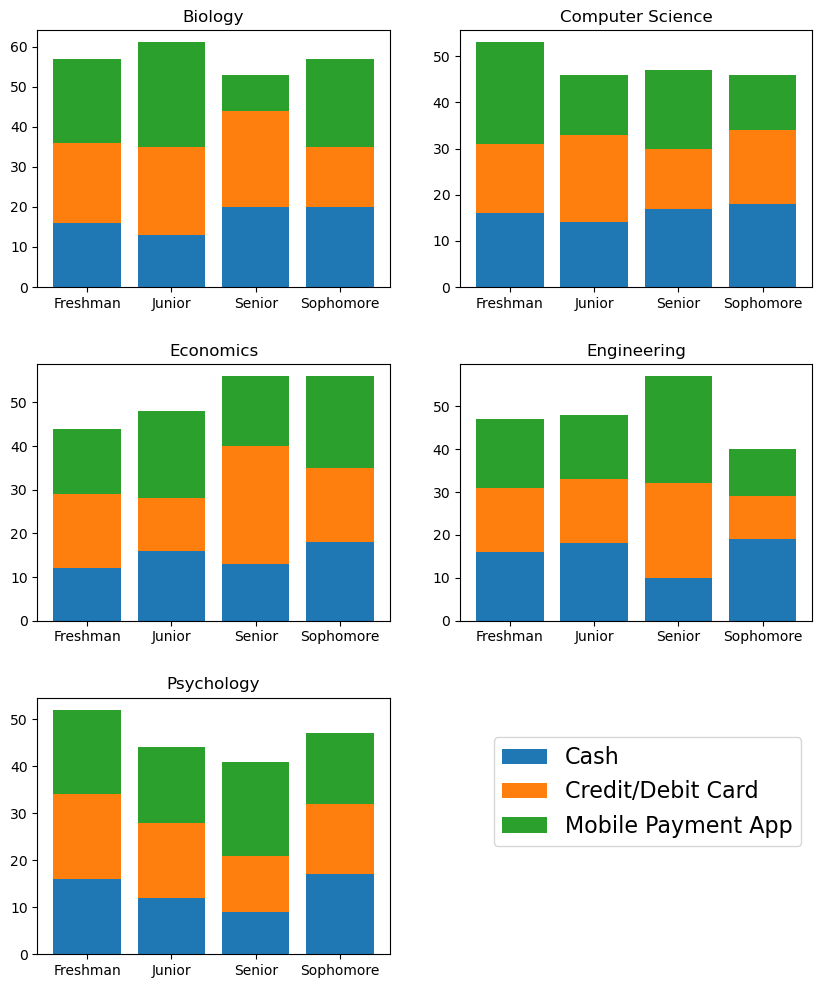

In [19]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10,12))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
ax6.set_visible(False)
for i in range(0, 5):
    ax = axs[i]
    X = []
    Y1 = []
    Y2 = []
    Y3 = []
    sectors = ["Cash", "Credit/Debit Card", "Mobile Payment App"]
    for j in range(0, 4):
        X.append(df_.index[12*i + j*3][1])
        Y1.append(df_.iloc[12*i + j*3, 0])
        Y2.append(df_.iloc[12*i + j*3 + 1, 0])
        Y3.append(df_.iloc[12*i + j*3 + 2, 0])
    
    ax.set(title=df_.index[i*12][0])
    ax.bar(X, Y1, label=sectors[0])
    ax.bar(X, Y2, bottom=Y1, label=sectors[1])
    ax.bar(X, Y3, bottom=[d + b for d, b in zip(Y1, Y2)], label=sectors[2])
    
plt.subplots_adjust(hspace=0.3)

fig.legend(["Cash", "Credit/Debit Card", "Mobile Payment App"], bbox_to_anchor=(0.9, 0.3), fontsize=16)
plt.savefig("figures/Question7.svg")

### 4. Kết luận

Đối với các năm học khác nhau của cùng 1 chuyên ngành, sinh viên có xu hướng thay đổi phương thức ưu tiên thanh toán.

## Câu hỏi 8: Có thể dự đoán được phương thức thanh toán ưu tiên dựa vào Monthly Income và tổng chi tiêu (trừ học phí) của sinh viên không?

### 1. Mục đích

Biết được liệu thu nhập hàng tháng và tổng chi tiêu có ảnh hướng đến cách chọn phương thức ưu tiên thanh toán của sinh viên hay không.

### 2. Phân tích

In [20]:
df__ = data_df.copy(deep = True)
df__["Total Expenditures"] = df__.iloc[:, 6:16].sum(axis=1)
df__.head()

,Age,Gender,Year In School,Major,Monthly Income,Financial Aid,Tuition,Housing,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous,Preferred Payment Method,Total Spending,Total Expenditures
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card,7977,7707
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card,7631,6756
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash,5738,4810
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App,6930,6665
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card,6350,5828


### 3. Trực quan hóa

Chọn biểu đồ scatter.

- Quan sát được phân bố của các điểm dữ liệu.
- Nhìn nhận được các điểm dữ liệu có phân bố theo một quy luật nào không.

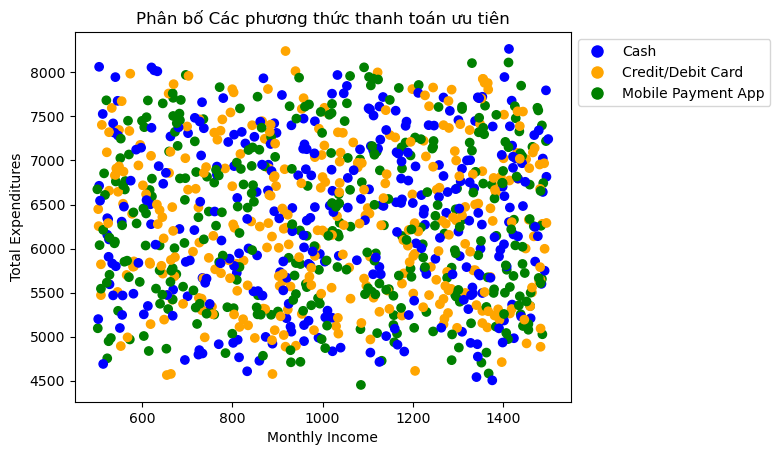

In [21]:
x = df__["Monthly Income"]
y = df__["Total Expenditures"]
colors = []
for method in df__["Preferred Payment Method"]:
    if method == "Cash":
        colors.append('blue')
    elif method == "Credit/Debit Card":
        colors.append('orange')
    elif method == "Mobile Payment App":
        colors.append('green')

# Vẽ scatter plot
scatter = plt.scatter(x, y, c=colors)

# Tạo các proxy artists cho legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cash'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Credit/Debit Card'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Mobile Payment App')]

# Hiển thị legend
plt.legend(handles=legend_handles, bbox_to_anchor=(1, 1))

# Đặt nhãn cho trục x, trục y và tiêu đề
plt.xlabel("Monthly Income")
plt.ylabel("Total Expenditures")
plt.title("Phân bố Các phương thức thanh toán ưu tiên")

plt.savefig("figures/Question8.svg")

### 4. Kết luận

Chưa thể dự đoán các phương thức thanh toán ưu tiên của sinh viên (Preferred Payment Method) dựa vào thu nhập hàng tháng (Monthly Income) và tổng chi tiêu (Total Expenditures).